# Data wrangling

## Contents<a id='Contents'></a>
* [Data wrangling](#Data_wrangling)
  * [Contents](#Contents)
  * [Project Overview](#Project_Overview)
    * [Problem Statement](#Problem_Statement)
    * [Objectives](#Objectives)
    * [Metrics](#Metrics)
    * [Imports](#Imports)  
  * [Load The Data](#Load_The_Data)
    * [Dataset](#Dataset)
  * [Data Exploration](#Data_Exploration)
    * [Categorical Features](#Categorical_Features)
    * [Numeric Features](#Numeric_Features)
  * [Feature Engineering](#Feature_Engineering)
  * [Review distributions](#Review_distributions)
  * [Population data](#Population_data)
  * [Target Feature](#Target_Feature) 
* [Results](#Results)
* [Conclusion](#Conclusion)
* [References](#References)

## Project Overview

###  Problem Statement <a id='2.2.1_Problem'></a>

The goal of this project is creating a model that predicts the length-of-stay for each patient at the time of admission,
also identify factors are associated with length of hospital stay based on health records, in order to manage hospital stay more efficiently.

The inputs to the prediction model will include features such as patient’s diagnosis category, and continuous laboratory measurements.

###  Objectives

###  Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import missingno as msno
from scipy import stats
from matplotlib.legend import Legend
%matplotlib inline

## Load The Data

###  Dataset

LengthOfStay.csv
The LengthOfStay.csv file contains the following patient information.



https://github.com/microsoft/r-server-hospital-length-of-stay/blob/master/Python/Hospital_Length_Of_Stay_Notebook.ipynb

In [2]:
df=pd.read_csv('LengthOfStay.csv')

## Data Exploration

In this section, I'll examine the various imported DataFrames to understand how the data is distributed. Additionaly, I need to  understand what features (independent variables) may be useful in predicting LOS.

In [3]:
df.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4


In [4]:
df.shape

(100000, 28)

In [5]:
df.dtypes

eid                             int64
vdate                          object
rcount                         object
gender                         object
dialysisrenalendstage           int64
asthma                          int64
irondef                         int64
pneum                           int64
substancedependence             int64
psychologicaldisordermajor      int64
depress                         int64
psychother                      int64
fibrosisandother                int64
malnutrition                    int64
hemo                            int64
hematocrit                    float64
neutrophils                   float64
sodium                        float64
glucose                       float64
bloodureanitro                float64
creatinine                    float64
bmi                           float64
pulse                           int64
respiration                   float64
secondarydiagnosisnonicd9       int64
discharged                     object
facid       

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

In [7]:
print('Dataset has {} number of unique admission events.'.format(df['eid'].nunique()))
print('Dataset has {} number of unique used facility.'.format(df['facid'].nunique()))

Dataset has 100000 number of unique admission events.
Dataset has 5 number of unique used facility.


### Features

### Target Feature : LengthofStay

Length of stay for the encounter

In [8]:
df['lengthofstay'].describe()

count    100000.00000
mean          4.00103
std           2.36031
min           1.00000
25%           2.00000
50%           4.00000
75%           6.00000
max          17.00000
Name: lengthofstay, dtype: float64

In [9]:
sorted(df['lengthofstay'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

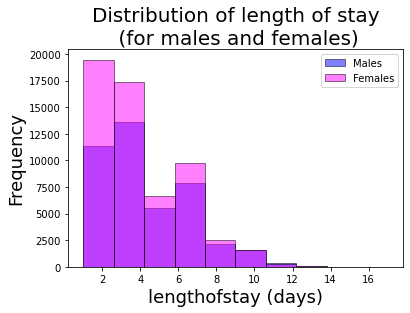

In [10]:
# Histogram of the lengthofstay for males and females
 
df[df['gender']=='M'].lengthofstay.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5)
df[df['gender']=='F'].lengthofstay.plot(kind='hist',color='magenta',edgecolor='black',alpha=0.5)

plt.legend(labels=['Males','Females'])
plt.title('Distribution of length of stay\n (for males and females)', size=20)
plt.xlabel('lengthofstay (days)', size=18)
plt.ylabel('Frequency', size=18);

In [11]:
# Descriptive statistics male
statistics_male = df[df['gender']=='M'].describe()
statistics_male.rename(columns=lambda x:x+'_male',inplace=True)
#statistics_male

# Descriptive statistics female
statistics_female = df[df['gender']=='F'].describe()
statistics_female.rename(columns=lambda x:x+'_female',inplace=True)
#statistics_female

# Dataframe that contains statistics for both male and female
statistics_gender = pd.concat([statistics_male,statistics_female], axis=1)
statistics_gender


,eid_male,dialysisrenalendstage_male,asthma_male,irondef_male,pneum_male,substancedependence_male,psychologicaldisordermajor_male,depress_male,psychother_male,fibrosisandother_male,...,neutrophils_female,sodium_female,glucose_female,bloodureanitro_female,creatinine_female,bmi_female,pulse_female,respiration_female,secondarydiagnosisnonicd9_female,lengthofstay_female
count,42357.000000,42357.000000,42357.000000,42357.000000,42357.000000,42357.000000,42357.000000,42357.000000,42357.000000,42357.000000,...,57643.000000,57643.000000,57643.000000,57643.000000,57643.000000,57643.000000,57643.000000,57643.000000,57643.000000,57643.000000
mean,50287.037538,0.052601,0.021980,0.129872,0.052223,0.076918,0.312581,0.047052,0.072196,0.005902,...,10.694826,137.895707,142.100061,12.748089,1.098602,29.808415,73.408792,6.467914,2.122651,3.860261
std,29018.258981,0.223237,0.146619,0.336167,0.222479,0.266464,0.463551,0.211754,0.258815,0.076600,...,5.384736,3.005519,30.006124,10.718632,0.199961,2.004421,11.625908,0.537305,2.047215,2.335981
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,124.912632,11.047504,2.000000,0.219770,22.037695,21.000000,0.200000,0.000000,1.000000
25%,25152.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.200000,135.876231,121.741430,10.000000,0.964804,28.460766,66.000000,6.500000,1.000000,2.000000
50%,50388.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.400000,137.900236,142.223230,12.000000,1.097804,29.806634,73.000000,6.500000,1.000000,4.000000
75%,75564.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,12.600000,139.926545,162.308172,12.000000,1.233749,31.159108,81.000000,6.500000,3.000000,5.000000
max,99999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,245.900000,151.387283,264.888305,474.000000,1.890677,38.935293,126.000000,9.800000,10.000000,17.000000


###  Categorical Features

####  facid

Facility ID at which the encounter occurred.

In [12]:
df['facid'].unique()

array(['B', 'A', 'E', 'D', 'C'], dtype=object)

In [13]:
fac_data= {'Id':['C','E','A','B','D'],
           'Name':['General Medicine 3 South','Behavioral 1 East','General Medicine 3 West','Pulmonary 2 West','Geriatrics 2 East'],
           'Capacity':[30,95,75,80,100]}
facility=pd.DataFrame(fac_data)
facility

,Id,Name,Capacity
0,C,General Medicine 3 South,30
1,E,Behavioral 1 East,95
2,A,General Medicine 3 West,75
3,B,Pulmonary 2 West,80
4,D,Geriatrics 2 East,100


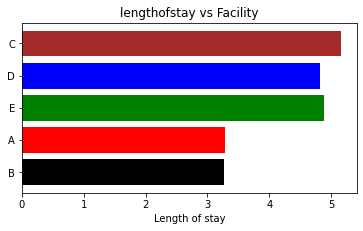

In [14]:
height = df.groupby('facid')['lengthofstay'].mean()
#facilities = ('E: Behavioral 1 East','D: Geriatrics 2 East','C: General Medicine 3 South','B: Pulmonary 2 West','A: General Medicine 3 West')

y_pos=df['facid'].unique()
plt.barh(y_pos, height, color=['black', 'red', 'green', 'blue', 'brown']) 
#plt.yticks(y_pos, bars)
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.title('lengthofstay vs Facility')
plt.xlabel('Length of stay')
plt.show()

In [15]:
facility['Id']

0    C
1    E
2    A
3    B
4    D
Name: Id, dtype: object

##  Feature Engineering

In this step, we design new features:

    1. The continuous laboratory measurements (hematocrit, neutrophils, sodium, glucose, bloodureanitro, creatinine, bmi, pulse, respiration) which are standardized.
    2. number_of_issues: the total number of preidentified medical conditions.

###  1.lab_measurements ( Numerical Features )

In [16]:
lab_measurements=df[["hematocrit", "neutrophils", "sodium", "glucose", "bloodureanitro", "creatinine", "bmi", "pulse", "respiration","secondarydiagnosisnonicd9","lengthofstay","gender"]]
lab_measurements

,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay,gender
0,11.5,14.20,140.361132,192.476918,12.0,1.390722,30.432418,96,6.5,4,3,F
1,9.0,4.10,136.731692,94.078507,8.0,0.943164,28.460516,61,6.5,1,7,F
2,8.4,8.90,133.058514,130.530524,12.0,1.065750,28.843812,64,6.5,2,3,F
3,11.9,9.40,138.994023,163.377028,12.0,0.906862,27.959007,76,6.5,1,1,F
4,9.1,9.05,138.634836,94.886654,11.5,1.242854,30.258927,67,5.6,2,4,F
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12.0,9.30,132.614977,171.422555,12.0,0.650323,30.063069,80,6.5,1,6,M
99996,12.0,9.30,138.327320,122.342450,12.0,1.521424,28.969548,61,6.5,1,1,M
99997,16.0,7.70,136.695905,108.288106,12.0,1.025677,26.354919,61,6.9,1,4,M
99998,14.3,8.20,135.980516,111.750731,16.0,1.035400,29.193462,59,5.6,1,4,M


In [17]:
lab_measurements.describe()

,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,11.975939,10.177455,137.891397,141.963384,14.097185,1.099350,29.805759,73.444720,6.493768,2.123310,4.00103
std,2.031792,5.353131,2.999669,29.992996,12.952454,0.200262,2.003769,11.644555,0.568473,2.050641,2.36031
min,4.400000,0.100000,124.912632,-1.005927,1.000000,0.219770,21.992683,21.000000,0.200000,0.000000,1.00000
25%,10.900000,7.700000,135.871062,121.682383,11.000000,0.964720,28.454235,66.000000,6.500000,1.000000,2.00000
50%,11.900000,9.400000,137.887151,142.088545,12.000000,1.098764,29.807516,73.000000,6.500000,1.000000,4.00000
75%,12.900000,11.500000,139.912885,162.180996,14.000000,1.234867,31.156885,81.000000,6.500000,3.000000,6.00000
max,24.100000,245.900000,151.387283,271.444277,682.500000,2.035202,38.935293,130.000000,10.000000,10.000000,17.00000


### Distributions Review for lab_measurements 

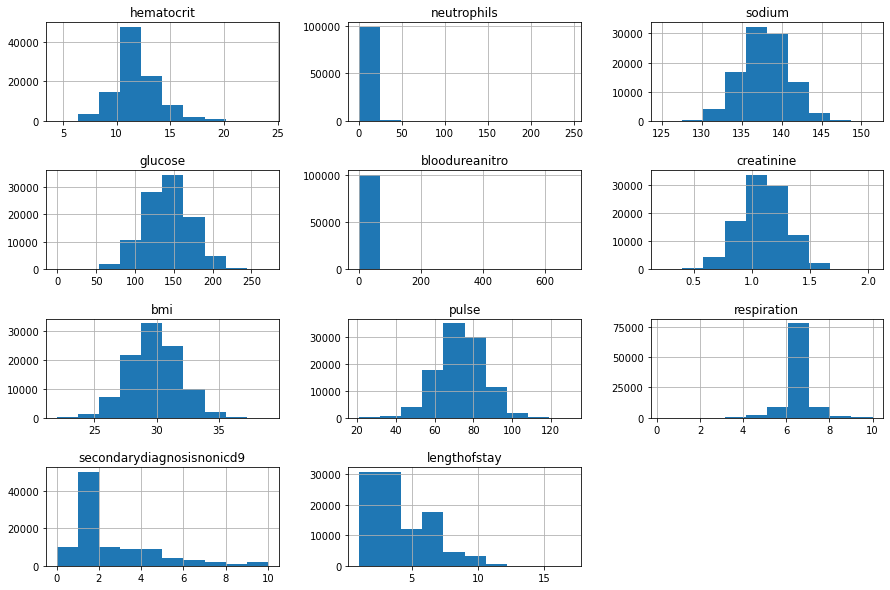

In [18]:
lab_measurements.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

What features do we have possible cause for concern about and why?
1. neutrophils , because values are clustered down the low end
2. bloodureanitro , because all but one value is 0 so it has very little variance
3. respiration , because values are clustered down the low end
4. secondarydiagnosisnonicd9

### Relationship between lenght of stay and lab_measurements

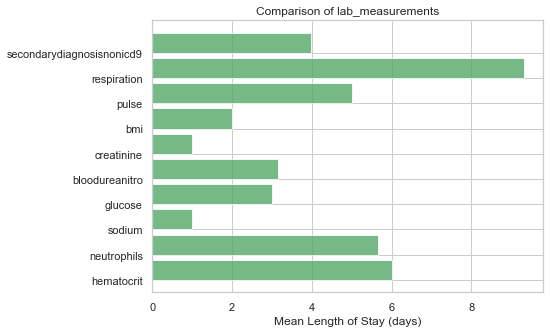

In [19]:
lab_measurements_list=["hematocrit", "neutrophils", "sodium", "glucose", "bloodureanitro",
                          "creatinine", "bmi", "pulse", "respiration","secondarydiagnosisnonicd9"]

results = []
for variable in lab_measurements_list:
    results.append(lab_measurements[[variable, 'lengthofstay']].groupby(variable).mean().reset_index().values[1][1])

sns.set(style="whitegrid")
#sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(7,5))
ind = range(len(results))
ax.barh(ind, results, align='edge', color = '#55a868', alpha=0.8)
ax.set_yticks(ind)
ax.set_yticklabels(lab_measurements_list)
ax.set_xlabel('Mean Length of Stay (days)')
ax.tick_params(left=False, right=False, top=False) 
ax.set_title('Comparison of lab_measurements'.format(variable))
plt.show();

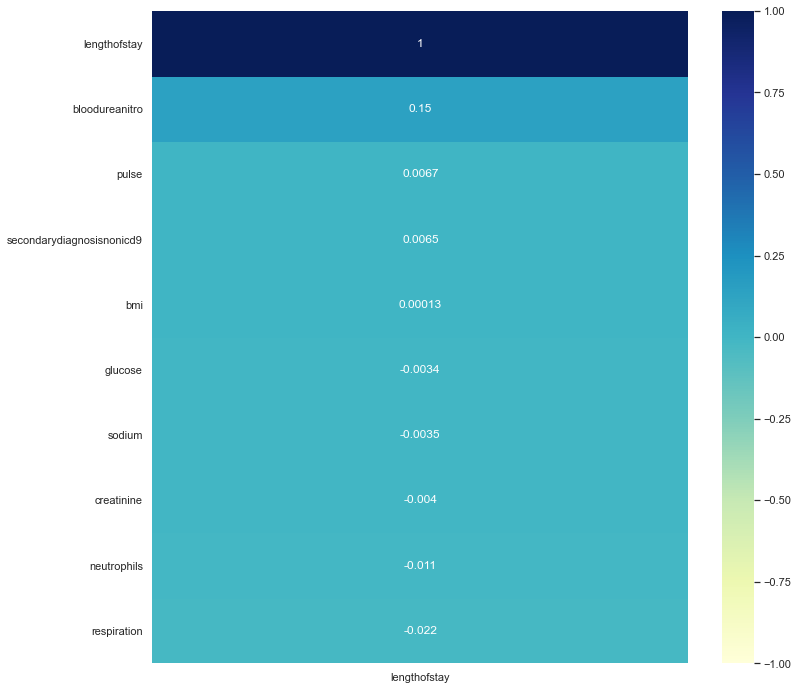

In [20]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(lab_measurements.corr()[['lengthofstay']].sort_values('lengthofstay').tail(10),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

####  bloodureanitro 

Average blood urea nitrogen value during encounter (mg/dL)

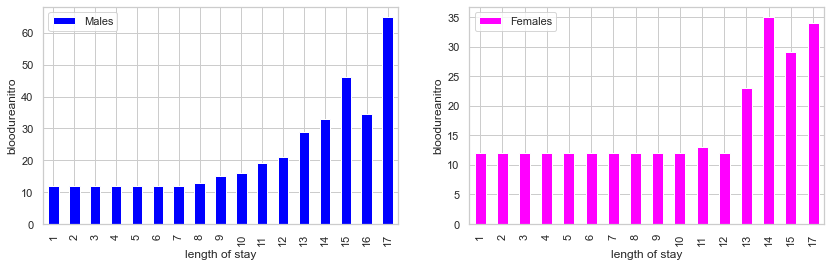

In [21]:
fig = plt.figure(figsize=(14,4))

ax1 = fig.add_subplot(121)
lab_measurements[['lengthofstay','bloodureanitro']][lab_measurements['gender']=='M'].groupby('lengthofstay')['bloodureanitro'].median().plot(kind='bar',color='blue')
ax1.set_xlabel('length of stay')
ax1.set_ylabel('bloodureanitro')
plt.legend(labels=['Males'])

ax2 = fig.add_subplot(122)
lab_measurements[['lengthofstay','bloodureanitro']][lab_measurements['gender']=='F'].groupby('lengthofstay')['bloodureanitro'].median().plot(kind='bar', color='magenta')
ax2.set_xlabel('length of stay')
ax2.set_ylabel('bloodureanitro')
plt.legend(labels=['Females'])
plt.show()

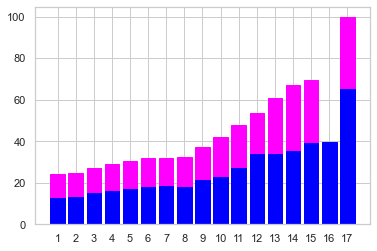

In [22]:
import numpy as np
import matplotlib.pyplot as plt

columns = sorted(lab_measurements['lengthofstay'].unique())
pos = np.arange(17)

var_one = lab_measurements[['lengthofstay','bloodureanitro']][lab_measurements['gender']=='M'].groupby('lengthofstay')['bloodureanitro'].mean()
var_two = lab_measurements[['lengthofstay','bloodureanitro']][lab_measurements['gender']=='F'].groupby('lengthofstay')['bloodureanitro'].mean()


plt.bar(pos, np.add(var_two, var_one), color='magenta', edgecolor='magenta')
plt.bar(pos, var_one, color='blue', edgecolor='blue')
plt.xticks(pos, columns)
plt.show()

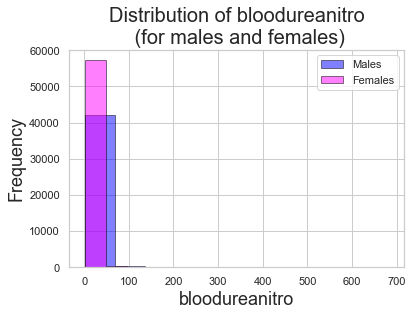

In [23]:
# Histogram of the bloodureanitro for males and females
 
lab_measurements[lab_measurements['gender']=='M'].bloodureanitro.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5)
lab_measurements[lab_measurements['gender']=='F'].bloodureanitro.plot(kind='hist',color='magenta',edgecolor='black',alpha=0.5)

plt.legend(labels=['Males','Females'])
plt.title('Distribution of bloodureanitro\n (for males and females)', size=20)
plt.xlabel('bloodureanitro', size=18)
plt.ylabel('Frequency', size=18);

###  2. Diagnoses  ( Categorical Features )

In this step we make the column of The total number of preidentified medical conditionsor number of issues.

In [24]:
# number_of_issues transform function
#issues=pd.DataFrame(index=["hemo","dialysisrenalendstage","asthma","irondef","pneum","substancedependence","psychologicaldisordermajor","depress","psychother","fibrosisandother","malnutrition"])

df["number_of_issues"]= pd.to_numeric(df["hemo"]) + pd.to_numeric(df["dialysisrenalendstage"]) + pd.to_numeric(df["asthma"])\
                               + pd.to_numeric(df["irondef"]) + pd.to_numeric(df["pneum"]) + pd.to_numeric(df["substancedependence"])\
                               + pd.to_numeric(df["psychologicaldisordermajor"]) + pd.to_numeric(df["depress"])\
                               + pd.to_numeric(df["psychother"]) + pd.to_numeric(df["fibrosisandother"]) + pd.to_numeric(df["malnutrition"]) 

In [25]:
df["number_of_issues"].unique()

array([0, 2, 1, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [26]:
issues=df[[ "hemo","dialysisrenalendstage","asthma","irondef","pneum","substancedependence","psychologicaldisordermajor","depress","psychother","fibrosisandother","malnutrition","number_of_issues","lengthofstay"]]
issues

,hemo,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,malnutrition,number_of_issues,lengthofstay
0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,0,0,7
2,0,0,0,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,0,0,0,0,0,0,0,0,6
99996,0,0,0,0,0,0,0,0,0,0,0,0,1
99997,0,0,0,1,0,0,0,0,0,0,0,1,4
99998,0,0,0,0,0,0,0,1,0,0,0,1,4


### Distributions Review for Issues

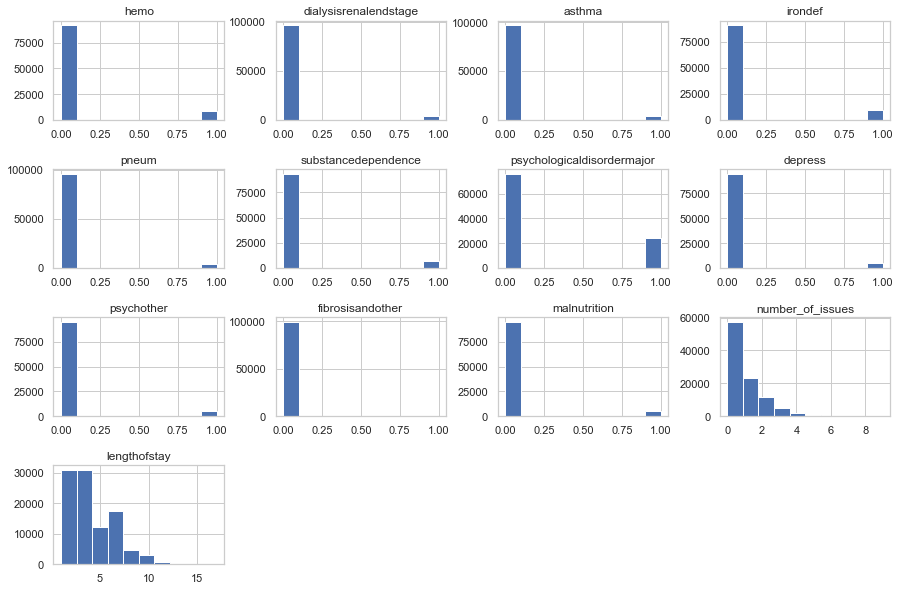

In [27]:
issues.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

What features do we have possible cause for concern about and why?

hemo, dialysisrenalendstage, asthma, irondef, pneum, substancedependence, psychologicaldisordermajor, depress, psychother, fibrosisandother, malnutrition

because values are clustered down the low end



### number_of_issues (Diagnoses)

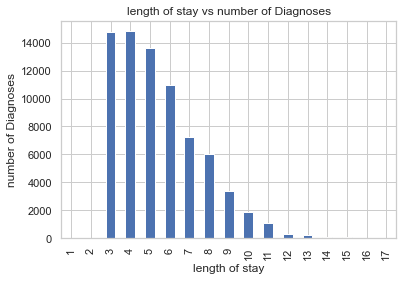

In [28]:
issues[['lengthofstay','number_of_issues']].groupby('lengthofstay')['number_of_issues'].sum().plot(kind='bar')
plt.xlabel('length of stay')
plt.ylabel('number of Diagnoses')
plt.title('length of stay vs number of Diagnoses')
plt.show()

### Relationship between lenghtofstay and Diagnoses

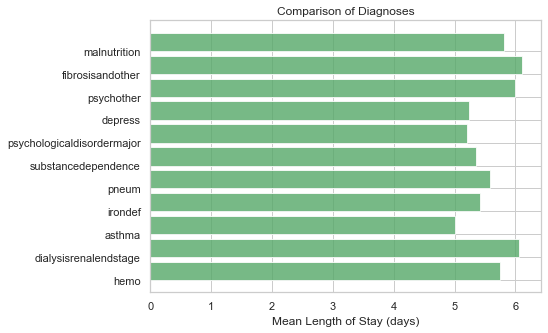

In [29]:
issues_List=["hemo","dialysisrenalendstage","asthma","irondef","pneum","substancedependence","psychologicaldisordermajor","depress","psychother","fibrosisandother","malnutrition"]
results = []
for variable in issues_List:
    results.append(issues[[variable, 'lengthofstay']].groupby(variable).mean().reset_index().values[1][1])

sns.set(style="whitegrid")
#sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(7,5))
ind = range(len(results))
ax.barh(ind, results, align='edge', color = '#55a868', alpha=0.8)
ax.set_yticks(ind)
ax.set_yticklabels(issues_List)
ax.set_xlabel('Mean Length of Stay (days)')
ax.tick_params(left=False, right=False, top=False) 
ax.set_title('Comparison of Diagnoses'.format(variable))
plt.show();

###  Correlation Heatmap of Diagnoses and  Length of stay

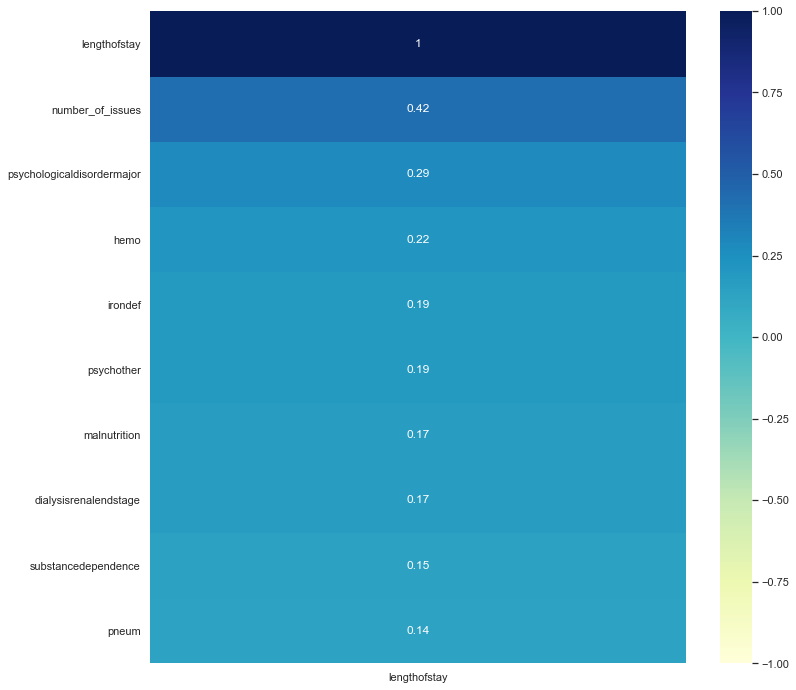

In [30]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(issues.corr()[['lengthofstay']].sort_values('lengthofstay').tail(10),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

####  psychologicaldisordermajor

Flag for major psychological disorder during encounter

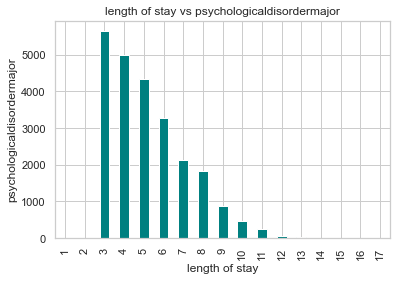

In [31]:
issues[['lengthofstay','psychologicaldisordermajor']].groupby('lengthofstay')['psychologicaldisordermajor'].sum().plot(kind='bar',color='teal')
plt.xlabel('length of stay')
plt.ylabel('psychologicaldisordermajor')
plt.title('length of stay vs psychologicaldisordermajor')
plt.show()

In [32]:
temp1 = issues['psychologicaldisordermajor'].value_counts()
temp2 = issues[['lengthofstay','psychologicaldisordermajor']].groupby('psychologicaldisordermajor')['lengthofstay'].mean()
print ('Frequency Table for psychologicaldisordermajor:') 
print (temp1)

print ('\nProbility of lengthofstay by psychologicaldisordermajor:')
print (temp2)

Frequency Table for psychologicaldisordermajor:
0    76096
1    23904
Name: psychologicaldisordermajor, dtype: int64

Probility of lengthofstay by psychologicaldisordermajor:
psychologicaldisordermajor
0    3.621728
1    5.208501
Name: lengthofstay, dtype: float64


Text(0.5, 1.0, 'Probility of lengthofstay \n by psychologicaldisordermajor')

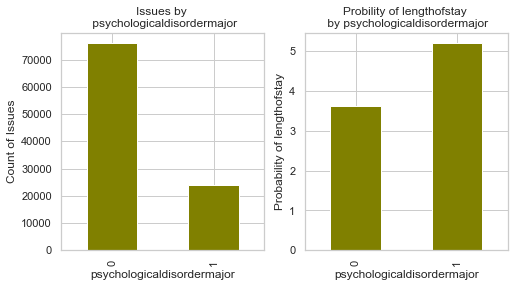

In [33]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('psychologicaldisordermajor')
ax1.set_ylabel('Count of Issues')
ax1.set_title("Issues by \n psychologicaldisordermajor")
temp1.plot(kind='bar',color='olive')
 
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar',color='olive')
ax2.set_xlabel('psychologicaldisordermajor')
ax2.set_ylabel('Probability of lengthofstay')
ax2.set_title("Probility of lengthofstay \n by psychologicaldisordermajor")

####  hemo

Flag for blood disorder during encounter

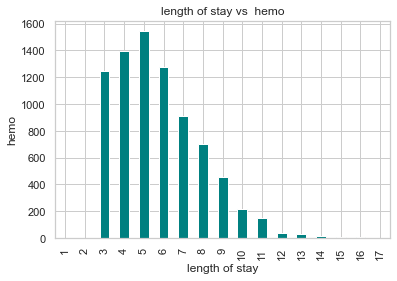

In [34]:
issues[['lengthofstay','hemo']].groupby('lengthofstay')['hemo'].sum().plot(kind='bar',color='teal')
plt.xlabel('length of stay')
plt.ylabel('hemo')
plt.title('length of stay vs  hemo')
plt.show()

In [35]:
temp1 = issues['hemo'].value_counts()
temp2 = issues[['lengthofstay','hemo']].groupby('hemo')['lengthofstay'].mean()
print ('Frequency Table for hemo:') 
print (temp1)
print ('\nProbility of lengthofstay by hemo:')
print (temp2)

Frequency Table for hemo:
0    92000
1     8000
Name: hemo, dtype: int64

Probility of lengthofstay by hemo:
hemo
0    3.849511
1    5.743500
Name: lengthofstay, dtype: float64


Text(0.5, 1.0, 'Probility of lengthofstay by hemo')

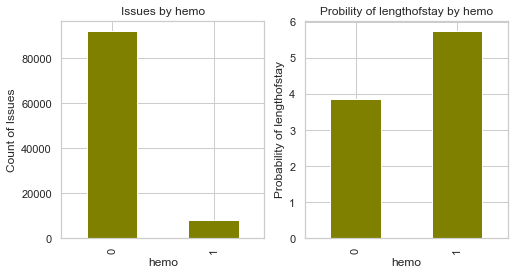

In [36]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('hemo')
ax1.set_ylabel('Count of Issues')
ax1.set_title("Issues by hemo")
temp1.plot(kind='bar',color='olive')
 
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar',color='olive')
ax2.set_xlabel('hemo')
ax2.set_ylabel('Probability of lengthofstay')
ax2.set_title("Probility of lengthofstay by hemo")

####  irondef

Flag for iron deficiency during encounter

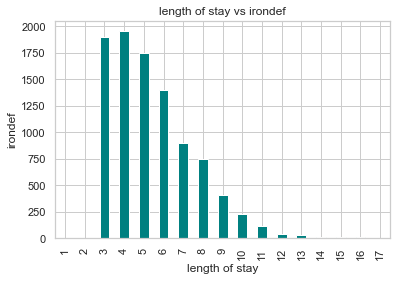

In [37]:
issues[['lengthofstay','irondef']].groupby('lengthofstay')['irondef'].sum().plot(kind='bar',color='teal')
plt.xlabel('length of stay')
plt.ylabel('irondef')
plt.title('length of stay vs irondef')
plt.show()

In [38]:
temp1 = issues['irondef'].value_counts()
temp2 = issues[['lengthofstay','irondef']].groupby('irondef')['lengthofstay'].mean()
print ('Frequency Table for irondef:') 
print (temp1)

print ('\nProbility of lengthofstay by irondef:')
print (temp2)

Frequency Table for irondef:
0    90506
1     9494
Name: irondef, dtype: int64

Probility of lengthofstay by irondef:
irondef
0    3.85285
1    5.41363
Name: lengthofstay, dtype: float64


Text(0.5, 1.0, 'Probility of lengthofstay by irondef')

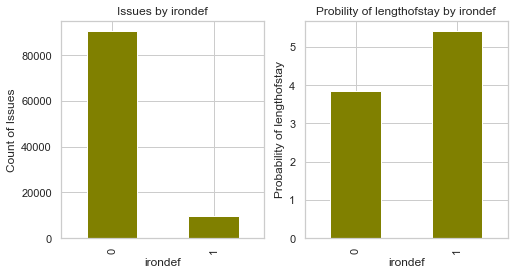

In [39]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('irondef')
ax1.set_ylabel('Count of Issues')
ax1.set_title("Issues by irondef")
temp1.plot(kind='bar',color='olive')
 
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar',color='olive')
ax2.set_xlabel('irondef')
ax2.set_ylabel('Probability of lengthofstay')
ax2.set_title("Probility of lengthofstay by irondef")

####  psychother

Flag for other psychological disorder during encounter

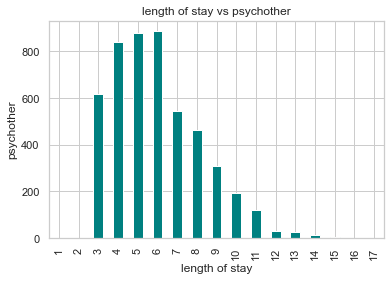

In [40]:
issues[['lengthofstay','psychother']].groupby('lengthofstay')['psychother'].sum().plot(kind='bar',color='teal')
plt.xlabel('length of stay')
plt.ylabel('psychother')
plt.title('length of stay vs psychother')
plt.show()

In [41]:
temp1 = issues['psychother'].value_counts()
temp2 = issues[['lengthofstay','psychother']].groupby('psychother')['lengthofstay'].mean()
print ('Frequency Table for psychother:') 
print (temp1)

print ('\nProbility of lengthofstay by psychother:')
print (temp2)

Frequency Table for psychother:
0    95061
1     4939
Name: psychother, dtype: int64

Probility of lengthofstay by psychother:
psychother
0    3.897897
1    5.986030
Name: lengthofstay, dtype: float64


Text(0.5, 1.0, 'Probility of lengthofstay \n by psychother')

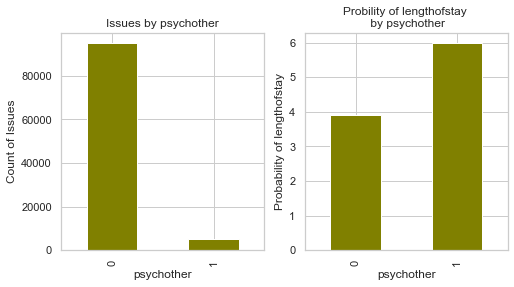

In [42]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('psychother')
ax1.set_ylabel('Count of Issues')
ax1.set_title("Issues by psychother")
temp1.plot(kind='bar',color='olive')
 
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar',color='olive')
ax2.set_xlabel('psychother')
ax2.set_ylabel('Probability of lengthofstay')
ax2.set_title("Probility of lengthofstay \n by psychother")

####   malnutrition

Flag for malnutrituion during encounter

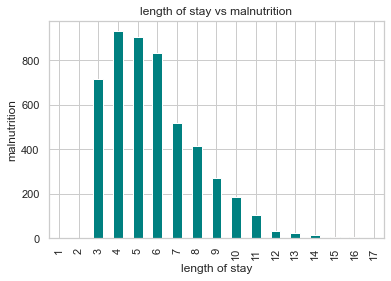

In [43]:
issues[['lengthofstay','malnutrition']].groupby('lengthofstay')['malnutrition'].sum().plot(kind='bar',color='teal')
plt.xlabel('length of stay')
plt.ylabel('malnutrition')
plt.title('length of stay vs malnutrition')
plt.show()

In [44]:
temp1 = issues['malnutrition'].value_counts()
temp2 = issues[['lengthofstay','malnutrition']].groupby('malnutrition')['lengthofstay'].mean()
print ('Frequency Table for malnutrition:') 
print (temp1)

print ('\nProbility of lengthofstay by malnutrition:')
print (temp2)

Frequency Table for malnutrition:
0    95052
1     4948
Name: malnutrition, dtype: int64

Probility of lengthofstay by malnutrition:
malnutrition
0    3.907114
1    5.805174
Name: lengthofstay, dtype: float64


Text(0.5, 1.0, 'Probility of lengthofstay \n by malnutrition')

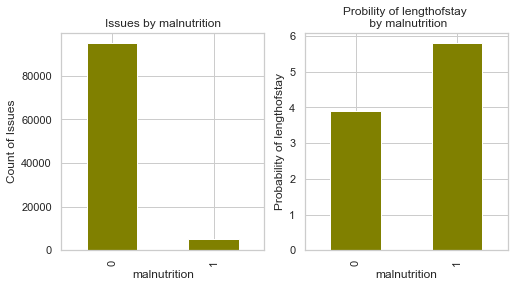

In [45]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('malnutrition')
ax1.set_ylabel('Count of Issues')
ax1.set_title("Issues by malnutrition")
temp1.plot(kind='bar',color='olive')
 
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar',color='olive')
ax2.set_xlabel('malnutrition')
ax2.set_ylabel('Probability of lengthofstay')
ax2.set_title("Probility of lengthofstay \n by malnutrition")

####  dialysisrenalendstage

Flag for renal disease during encounter

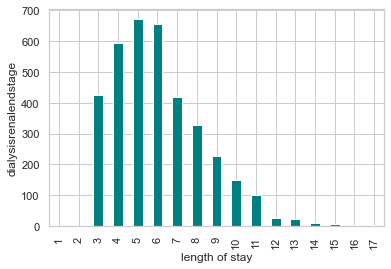

In [46]:
issues[['lengthofstay','dialysisrenalendstage']].groupby('lengthofstay')['dialysisrenalendstage'].sum().plot(kind='bar',color='teal')
plt.xlabel('length of stay')
plt.ylabel('dialysisrenalendstage')
plt.show()

In [47]:
temp1 = issues['dialysisrenalendstage'].value_counts()
temp2 = issues[['lengthofstay','dialysisrenalendstage']].groupby('dialysisrenalendstage')['lengthofstay'].mean()
print ('Frequency Table for dialysisrenalendstage:') 
print (temp1)

print ('\nProbility of lengthofstay by dialysisrenalendstage:')
print (temp2)

Frequency Table for dialysisrenalendstage:
0    96358
1     3642
Name: dialysisrenalendstage, dtype: int64

Probility of lengthofstay by dialysisrenalendstage:
dialysisrenalendstage
0    3.923162
1    6.061230
Name: lengthofstay, dtype: float64


Text(0.5, 1.0, 'Probility of lengthofstay \n  by dialysisrenalendstage')

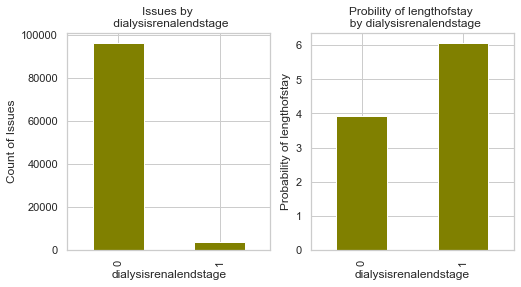

In [48]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('dialysisrenalendstage')
ax1.set_ylabel('Count of Issues')
ax1.set_title("Issues by \n dialysisrenalendstage")
temp1.plot(kind='bar',color='olive')
 
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar',color='olive')
ax2.set_xlabel('dialysisrenalendstage')
ax2.set_ylabel('Probability of lengthofstay')
ax2.set_title("Probility of lengthofstay \n  by dialysisrenalendstage")

####   substancedependence

Flag for substance dependence during encounter

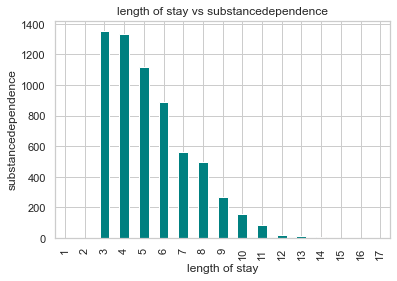

In [49]:
issues[['lengthofstay','substancedependence']].groupby('lengthofstay')['substancedependence'].sum().plot(kind='bar',color='teal')
plt.xlabel('length of stay')
plt.ylabel('substancedependence')
plt.title('length of stay vs substancedependence')
plt.show()

In [50]:
temp1 = issues['substancedependence'].value_counts()
temp2 = issues[['lengthofstay','substancedependence']].groupby('substancedependence')['lengthofstay'].mean()
print ('Frequency Table for substancedependence:') 
print (temp1)

print ('\nProbility of lengthofstay by substancedependence:')
print (temp2)

Frequency Table for substancedependence:
0    93694
1     6306
Name: substancedependence, dtype: int64

Probility of lengthofstay by substancedependence:
substancedependence
0    3.910475
1    5.346495
Name: lengthofstay, dtype: float64


Text(0.5, 1.0, 'Probility of lengthofstay \n by substancedependence')

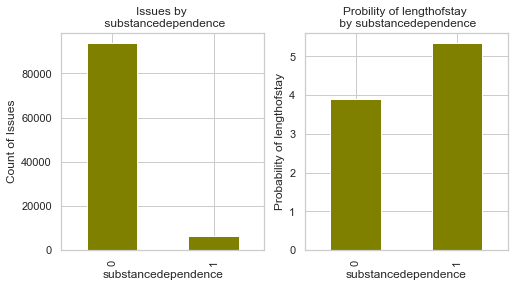

In [51]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('substancedependence')
ax1.set_ylabel('Count of Issues')
ax1.set_title("Issues by \n substancedependence")
temp1.plot(kind='bar',color='olive')
 
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar',color='olive')
ax2.set_xlabel('substancedependence')
ax2.set_ylabel('Probability of lengthofstay')
ax2.set_title("Probility of lengthofstay \n by substancedependence")

####  pneum

Flag for pneumonia during encounter

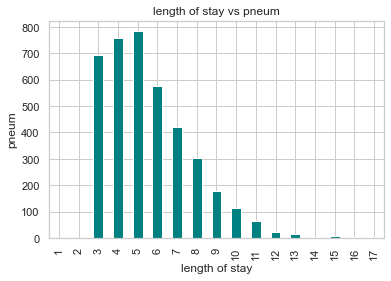

In [52]:
issues[['lengthofstay','pneum']].groupby('lengthofstay')['pneum'].sum().plot(kind='bar',color='teal')
plt.xlabel('length of stay')
plt.ylabel('pneum')
plt.title('length of stay vs pneum')
plt.show()

In [53]:
temp1 = issues['pneum'].value_counts()
temp2 = issues[['lengthofstay','pneum']].groupby('pneum')['lengthofstay'].mean()
print ('Frequency Table for pneum:') 
print (temp1)

print ('\nProbility of lengthofstay by pneum:')
print (temp2)

Frequency Table for pneum:
0    96055
1     3945
Name: pneum, dtype: int64

Probility of lengthofstay by pneum:
pneum
0    3.936234
1    5.578707
Name: lengthofstay, dtype: float64


Text(0.5, 1.0, 'Probility of lengthofstay by pneum')

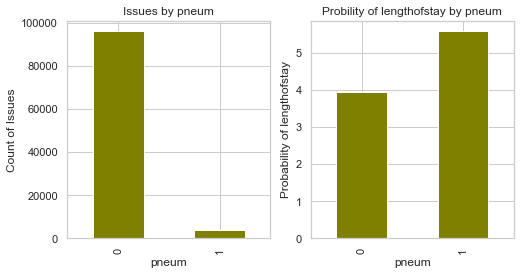

In [54]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('pneum')
ax1.set_ylabel('Count of Issues')
ax1.set_title("Issues by pneum")
temp1.plot(kind='bar',color='olive')
 
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar',color='olive')
ax2.set_xlabel('pneum')
ax2.set_ylabel('Probability of lengthofstay')
ax2.set_title("Probility of lengthofstay by pneum")

# References

1. https://microsoft.github.io/r-server-hospital-length-of-stay/
2. https://towardsdatascience.com/predicting-hospital-length-of-stay-at-time-of-admission-55dfdfe69598
3. Q&A: Primary, principal, and secondary diagnoses- https://www.hcpro.com/HIM-324035-5707/QA-Primary-principal-and-secondary-diagnoses.html#:~:text=Now%2C%20the%20Uniform%20Hospital%20Discharge,care%20during%20the%20current%20episode.
4. Diagnostic Code Descriptions (ICD-9) -https://www2.gov.bc.ca/gov/content/health/practitioner-professional-resources/msp/physicians/diagnostic-code-descriptions-icd-9